![img](ep8_2018-57x57.png)

# To bar, or not to bar - what is the intention?

**post @** [endlesspint.com](http://endlesspint.com/2018-11-07-to-bar-or-not-to-bar/)

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# comfort level
L = 60.

# wishing to attend
N = 100.

# previous 'm' Friday nights
m = 2.

In [3]:
N = 100

def preferences(N):
    return np.random.uniform(.0001,1,N)

np.random.seed(8)
patron_p = preferences(N)
patron_p[:10]

array([0.87344206, 0.96854381, 0.86920762, 0.53090261, 0.23280506,
       0.01149766, 0.43052577, 0.40241112, 0.5227224 , 0.47844396])

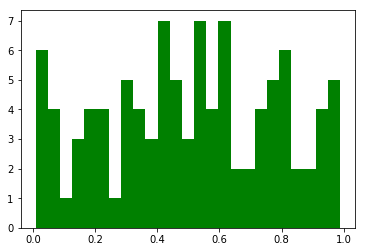

In [4]:
# https://stackoverflow.com/questions/22744577/plotting-basic-uniform-distribution-on-python
count, bins, ignored = plt.hist(patron_p, 25, facecolor='green')

In [5]:
def any_given_friday_night(patron_p, N=100, L=60, ind_friday=True):
    
    tally = np.zeros(N)
    # either one rand number or one for each, we'll see...
    if ind_friday == True:
        friday = np.random.uniform(.0001,1, N)
    else:
        friday = np.random.uniform(.0001, 1)
    
    going_out = friday <= patron_p
    staying_in = np.invert(going_out)
    
    yes_cnt = np.sum(going_out)
    nos_cnt = N - yes_cnt
    
    if yes_cnt == L:    # bar at optimal capacity everyone choose right/wins
        tally += going_out
        tally += staying_in
#         print(tally)
    elif yes_cnt < L:   # extra space at bar, should've gone out
        tally += going_out
        tally -= staying_in
#         print(tally)
    else:               # overcrowded bar, should've stayed in
        tally -= going_out
        tally += staying_in
#         print(tally)
    
    return yes_cnt, nos_cnt, tally, going_out


np.random.seed(9)
bar_y, bar_n, tally_run, _ = any_given_friday_night(patron_p, ind_friday=True)
print("the count that went out & stayed in, respectively: ", bar_y, bar_n)
print("the tally for the 'correct' choice: ", np.sum(tally_run==1))

the count that went out & stayed in, respectively:  57 43
the tally for the 'correct' choice:  57


In [6]:
yes = []
nos = []
tally_run = np.zeros(N)
# m = []  # historical winning strategy

# np.random.seed(10)
for i in range(100):
    bar_y, bar_n, tally_run, going_out = any_given_friday_night(patron_p, ind_friday=False)
    yes.append(bar_y)
    nos.append(bar_n)
        
    
print(yes[-10:])
print(nos[-10:])
print(np.sum(tally_run==1))

m = [True if y<=60 else False for y in yes]
print(tally_run[-10:])
print(m[-10:])
np.zeros(10) + m[-10:] - np.invert(m[-10:])

[30, 30, 29, 24, 28, 87, 30, 9, 95, 85]
[70, 70, 71, 76, 72, 13, 70, 91, 5, 15]
15
[ 1. -1. -1. -1. -1. -1.  1. -1.  1. -1.]
[True, True, True, True, True, False, True, True, False, False]


array([ 1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1., -1.])

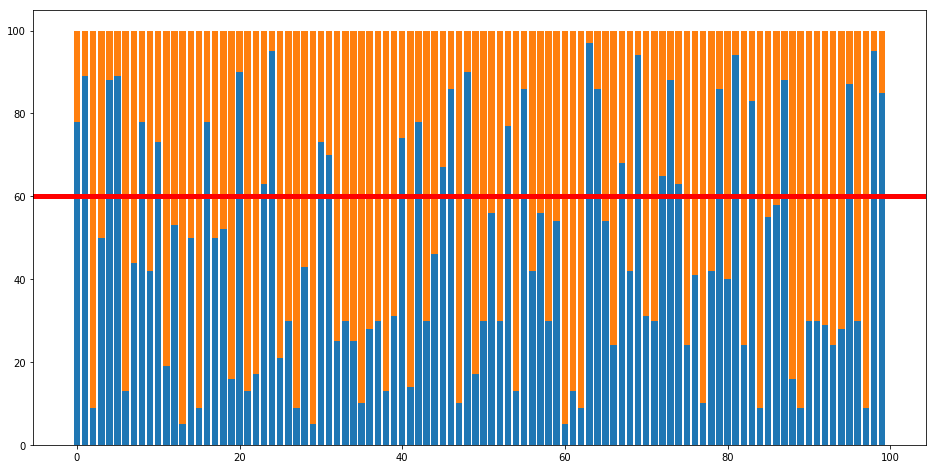

In [7]:
# https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
plt.figure(figsize=(16,8))
ind = np.arange(100)
p1 = plt.bar(ind, yes)
p2 = plt.bar(ind, nos, bottom=yes)
plt.axhline(y=60, linewidth=5, color='red')

** individual cut offs for going out/staying in result in too wild of swings, above just one example; later on, even with updating preferences, it remains eratic **

## iterate through tally, compare against 'd' (wins - loses threshold)
## set up 'patron_p' change for "losers"
## use 'm' to determine whether to up or lower the ps

In [8]:
# check tally, is it -3?

# review recent history, m[-2:], to determine go out more/less
# if 50/50 choose randomly

# determine by how much to update (+/-) ps

# plot ps hist over time

In [9]:
np.random.seed(8)
patron_p = preferences(N)
patron_p[8]

0.5227224038854343

In [10]:
temp_pref = patron_p.copy()

yes = []
nos = []
tally_run = np.zeros(N)
m = []  # historical winning strategy
pref_08 = []
tally08_run = []
tally08 = []
bar_08 = []
m_rate = []

print("Sanity check, preferences for ten persons  (pre-run):\n")
print(patron_p[-10:])

bar_runs = 1000
d = -3  # losing threshold
last_m_nights = 4
change_rate = .1

for i in range(bar_runs):
    bar_y, bar_n, tally, going_out = any_given_friday_night(temp_pref)
    yes.append(bar_y)
    nos.append(bar_n)
    tally_run += tally
    tally08_run.append(tally[8])
    
    # historical winning strategy
    if bar_y <= 60:
        m.append(True)
    else:
        m.append(False)
        
    pref_08.append(patron_p[8])
    tally08.append(tally_run[8])
        
    # check tally, is it -3?
    # update directionally to recent past
    m_recent = np.sum(m[-last_m_nights:])/np.min([last_m_nights, len(m)])
    m_rate.append(m_recent)
#     print(m_recent)
    temp_pref[tally_run <= d] += (temp_pref[tally_run <= d] - m_recent) * -change_rate
    tally_run[tally_run <= d] = tally[tally_run <= d] * 0.
    
    
    bar_08.append(going_out[8])
        

print("\nSanity check, preferences for ten persons (post-run):")
print(temp_pref[-10:])
print("\nLast ten 'yes's':")
print(yes[-10:])
print("\nLast ten 'no's':")
print(nos[-10:])
print("\nPublic memory ('shoulda gone out'):")
print(m[-10:])
print("\nEnding score for ten persons:")
print(tally_run[-10:])

# stats.describe(tally)

Sanity check, preferences for ten persons  (pre-run):

[0.17883914 0.61976344 0.56232716 0.76342827 0.80666567 0.29869534
 0.13847087 0.63543437 0.00840754 0.78860441]

Sanity check, preferences for ten persons (post-run):
[0.45363968 0.69200839 0.56136785 0.76342827 0.80666567 0.49585112
 0.51139845 0.63543437 0.5059887  0.78860441]

Last ten 'yes's':
[61, 57, 63, 61, 62, 54, 64, 60, 68, 55]

Last ten 'no's':
[39, 43, 37, 39, 38, 46, 36, 40, 32, 45]

Public memory ('shoulda gone out'):
[False, True, False, False, False, True, False, True, False, True]

Ending score for ten persons:
[42. 38. 30. 58. 56. 10. 12. 12.  4. 24.]


In [11]:
# a look at one 'customer' over time
# sanity check

pd.DataFrame(
    {'bar': yes,
     'home': nos,
     'go_out': m, 
     'ps08': pref_08,
     '+/-': tally08_run,
     'ty08': tally08,
     'bar08': bar_08,
     'm_rate': m_rate
    }, columns=['bar', 'home', 'go_out', 'bar08', 'ps08', '+/-', 'ty08', 'm_rate']).tail(10)

,bar,home,go_out,bar08,ps08,+/-,ty08,m_rate
990,61,39,False,False,0.522722,1.0,1.0,0.25
991,57,43,True,False,0.522722,-1.0,0.0,0.50
992,63,37,False,True,0.522722,-1.0,-1.0,0.50
993,61,39,False,False,0.522722,1.0,0.0,0.25
994,62,38,False,False,0.522722,1.0,1.0,0.25
995,54,46,True,False,0.522722,-1.0,0.0,0.25
996,64,36,False,True,0.522722,-1.0,-1.0,0.25
997,60,40,True,True,0.522722,1.0,0.0,0.50
998,68,32,False,True,0.522722,-1.0,-1.0,0.50
999,55,45,True,False,0.522722,-1.0,-2.0,0.50


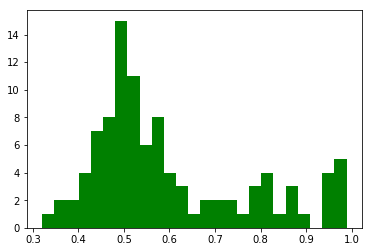

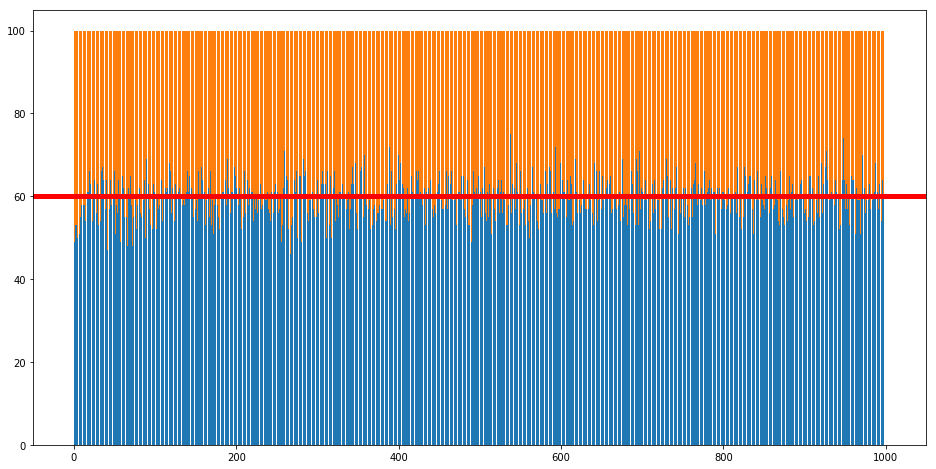

In [12]:
# https://stackoverflow.com/questions/22744577/plotting-basic-uniform-distribution-on-python
count, bins, ignored = plt.hist(temp_pref, 25, facecolor='green')

# https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
plt.figure(figsize=(16,8))
ind = np.arange(bar_runs)
p1 = plt.bar(ind, yes)
p2 = plt.bar(ind, nos, bottom=yes)
plt.axhline(y=60, linewidth=5, color='red')

* timeseries: capture runnnig tally for all N (100)

In [13]:
# what if they weren't describing the threshold, e.g., -3, as an absolute tally 
# but rather a short term one, say -3 in last dozen, ten, or five nights out?
# or even anytime it tallys -3 regardless window (too extreme?)


def going_out_and_evaluate(patron_p, N=len(patron_p), L=int(N*.6), d=-3, m_nights=2, change_rate=.1, bar_runs=1000, 
                           ind_friday=True,
                           re_eval=True, re_eval_binary=False, re_eval_w_contrarian=False):
    '''
    Parameters:
    -----------
    
    patron_p    : ndarray of patron preferences
    N           : number of patrons
    L           : max comfort level of venue
    d           : losing threshold
    m_nights    : number of most recent nights' best policy
    bar_runs    : 
    change_rate : 
    re_eval     : whether to reset patron preferences
    '''
    
    temp_pref = patron_p
    yes = []
    nos = []
    
    # historical winning strategy
    m = []
    
    # historical v contrarian preference
    if re_eval_w_contrarian==True:
        hist_contra = np.random.randint(2, size=N)
        hist_contra += (hist_contra-1)
    else:
        hist_contra = np.ones(N)
    
    tally_run = np.zeros(N)
    M = bar_runs+1
    tally_matrix = np.zeros(N*M).reshape(N, M)

    for i in range(bar_runs):
        bar_y, bar_n, tally, going_out = any_given_friday_night(temp_pref, ind_friday=ind_friday)
        yes.append(bar_y)
        nos.append(bar_n)
        tally_run += tally
        tally_matrix[:, i+1] = tally_matrix[:, i] + tally

        # historical winning strategy
        if bar_y <= L:
            m.append(True)
        else:
            m.append(False)


        if re_eval==True:
            
            # check tally, update directionally to recent past
            m_recent = np.sum(m[-m_nights:])/np.min([m_nights, len(m)])
            
            if re_eval_binary==True:
                # only care if should've gone out more/less & update
                discrete_target = (m_recent >= 0.5) * 1.0
                temp_pref[tally_run <= d] += (temp_pref[tally_run <= d] - discrete_target) * (-change_rate * hist_contra[tally_run <= d])
                tally_run[tally_run <= d] = tally[tally_run <= d] * 0.
            else:
                # by what ratio should've gone out more/less & update
                temp_pref[tally_run <= d] += (temp_pref[tally_run <= d] - m_recent) * (-change_rate * hist_contra[tally_run <= d])
                tally_run[tally_run <= d] = tally[tally_run <= d] * 0.

    return yes, nos, bar_runs, hist_contra, tally_run, tally_matrix, temp_pref


## run function

np.random.seed(8)
patron_p = preferences(N)
print("pre preferences: ", patron_p[:10])
yes, nos, bar_runs, _, final_tally, bar_matrix, new_pref = going_out_and_evaluate(patron_p, ind_friday=True,
                                                                                  re_eval=True, re_eval_binary=True, re_eval_w_contrarian=True)
print("\npost preferences: ", new_pref[:10])
print("\ninterquartile (cumulative): ", np.percentile(bar_matrix[:,-1], 25), np.percentile(bar_matrix[:,-1], 50), np.percentile(bar_matrix[:,-1], 75))
print("\ninterquartile (final tally): ", np.percentile(final_tally, 25), np.percentile(final_tally, 50), np.percentile(final_tally, 75))
print("\nfinal tally:\n", final_tally)

pre preferences:  [0.87344206 0.96854381 0.86920762 0.53090261 0.23280506 0.01149766
 0.43052577 0.40241112 0.5227224  0.47844396]

post preferences:  [ 8.73442060e-01  9.68543809e-01  8.69207621e-01 -4.23812220e+12
 -4.23913459e+13 -5.46196826e+13  5.38725875e-01 -1.15732262e+13
  5.22722404e-01 -6.89893697e+12]

interquartile (cumulative):  -938.5 140.0 472.0

interquartile (final tally):  -0.0 146.5 472.0

final tally:
 [748. 918. 736.  -1.  -2.  -2.  80.  -1.  72.  -1. 298. 195. 512. 470.
 246.  -0.  -0. 944.  -0.  -1. 198. 968.  -0. 143.  -2.  75.  42. 790.
  -2. 974.  81.  -0. 138. 508. 860.  -2.  90.  -2. 654. 296.  -2.  -0.
 628. 245.  -2. 554. 970. 144.  -0.  47. 158. 216. 221. 282. 106.  -0.
 478. 898. 876.  -2. 202. 290.  -2.  -1. 251.  -2.  74.  -2.  77. 181.
 220. 385.  -1. 149. 638.  99. 412. 123. 690. 448. 690.  -0.  -2.  -1.
  48. 210. 604.  70. 884. 450. 122. 177. 152. 494. 610. 103.  -0. 246.
  49. 588.]


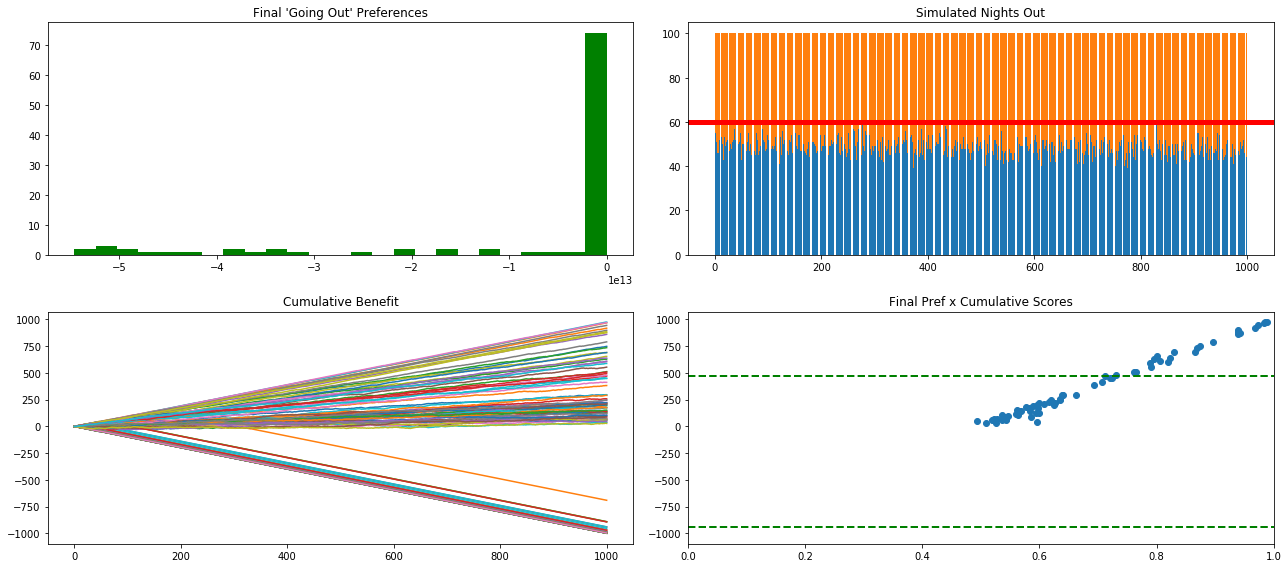

In [14]:
## plots

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 8))

ax1.hist(patron_p, 25, facecolor='green')
ax1.set_title("Final 'Going Out' Preferences")


# https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
ind = np.arange(bar_runs)
p1 = ax2.bar(ind, yes)
p2 = ax2.bar(ind, nos, bottom=yes)
ax2.axhline(y=60, linewidth=5, color='red')
ax2.set_title("Simulated Nights Out")

for row in range(bar_matrix.shape[0]):
    ax3.plot(bar_matrix[row])
ax3.set_title("Cumulative Benefit")

ax4.scatter(new_pref, bar_matrix[:,-1])
ax4.set_xlim(0.,1.)
ax4.axhline(y=np.percentile(bar_matrix[:,-1], 25), linewidth=2, color='green', ls='--')
ax4.axhline(y=np.percentile(bar_matrix[:,-1], 75), linewidth=2, color='green', ls='--')
ax4.set_title("Final Pref x Cumulative Scores")
    
plt.tight_layout()

In [15]:
# ds = [-10, -5, -3, -2, -1]
# ms = [10, 5, 3, 2, 1]
# cr = [.9, .75, .5, .2, .1]

ds = [-3, -2, -1]
ms = [10, 5, 3]
cr = [.9, .5, .2]
bn = [True, False]
ct = [True, False]

param_stats = []


for i in range(len(ds)):
    for j in range(len(ms)):
        for k in range(len(cr)):
            for l in range(len(bn)):
                for m in range(len(ct)):
                    for n in range(2):

                        temp_dict = {}
                        temp_dict['d_threshold'] = ds[i]
                        temp_dict['m_nights'] = ms[j]
                        temp_dict['change_rate'] = cr[k]
                        temp_dict['binary_eval'] = bn[l]
                        temp_dict['incl_contra'] = ct[m]
                        temp_dict['setting_run'] = n

                        yes, nos, bar_runs, _, final_tally, bar_matrix, new_pref = going_out_and_evaluate(patron_p, d=ds[i], m_nights=ms[j], 
                                                                                                       change_rate=cr[k], re_eval_binary=bn[l], 
                                                                                                       re_eval_w_contrarian=ct[m])

    #                         mean, minmax = stats.bayes_mvs(bar_matrix[:,-1], .95)[0]
    #                         temp_dict['min_ci_95'] = minmax[0]
    #                         temp_dict['max_ci_95'] = minmax[1]

                        temp_dict['median_tally'] = np.median(final_tally)
                        temp_dict['mean_tally'] = np.mean(final_tally)
                        temp_dict['mean_cuml'] = np.mean(bar_matrix[:,-1])

                        param_stats.append(temp_dict)


df_param_stats = pd.DataFrame(param_stats)
df_param_stats = df_param_stats[['d_threshold', 'm_nights', 'change_rate', 
                                 'binary_eval', 'incl_contra', 'setting_run', 
                                 'median_tally', 'mean_tally', 'mean_cuml']]
df_param_stats.head()

C:\Users\rstancut\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: overflow encountered in add
C:\Users\rstancut\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in add
C:\Users\rstancut\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less_equal
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rstancut\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: overflow encountered in add
C:\Users\rstancut\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in add


,d_threshold,m_nights,change_rate,binary_eval,incl_contra,setting_run,median_tally,mean_tally,mean_cuml
0,-3,10,0.9,True,True,0,80.0,98.22,79.20
1,-3,10,0.9,True,True,1,285.0,257.27,245.36
2,-3,10,0.9,True,False,0,274.0,316.18,316.12
3,-3,10,0.9,True,False,1,360.0,303.69,302.10
4,-3,10,0.9,False,True,0,300.0,311.06,310.82


In [16]:
# df_param_stats.to_excel("param_stats.xlsx")

In [19]:
# just the high performing settings

ds = [-3, -2]
ms = [10, 5, 3]
cr = [.9, .5, .2]
bn = [True, False]
ct = [True]

param_stats = []


for i in range(len(ds)):
    for j in range(len(ms)):
        for k in range(len(cr)):
            for l in range(len(bn)):
                for m in range(len(ct)):
                    for n in range(5):    # set to 5 for example purpose only, actual run at 100

                        temp_dict = {}
                        temp_dict['d_threshold'] = ds[i]
                        temp_dict['m_nights'] = ms[j]
                        temp_dict['change_rate'] = cr[k]
                        temp_dict['binary_eval'] = bn[l]
                        temp_dict['incl_contra'] = ct[m]
                        temp_dict['setting_run'] = n

                        yes, nos, bar_runs, hist_contra, final_tally, bar_matrix, new_pref = going_out_and_evaluate(patron_p, d=ds[i], m_nights=ms[j], 
                                                                                                       change_rate=cr[k], re_eval_binary=bn[l], 
                                                                                                       re_eval_w_contrarian=ct[m])

    #                         mean, minmax = stats.bayes_mvs(bar_matrix[:,-1], .95)[0]
    #                         temp_dict['min_ci_95'] = minmax[0]
    #                         temp_dict['max_ci_95'] = minmax[1]

#                         temp_dict['median_tally'] = np.median(final_tally)
#                         temp_dict['mean_tally'] = np.mean(final_tally)
                        temp_dict['mean_cuml'] = np.mean(bar_matrix[:,-1])
                        temp_dict['hist_cnt'] = np.sum([hist_contra==1])
                        temp_dict['mean_cuml_hist'] = np.mean(bar_matrix[:,-1][hist_contra==1])
                        temp_dict['contr_cnt'] = np.sum([hist_contra==-1])
                        temp_dict['mean_cuml_contr'] = np.mean(bar_matrix[:,-1][hist_contra==-1])

                        param_stats.append(temp_dict)


df_param_stats = pd.DataFrame(param_stats)
df_param_stats = df_param_stats[['d_threshold', 'm_nights', 'change_rate', 
                                 'binary_eval', 'incl_contra', 'setting_run', 
                                 'mean_cuml', 'hist_cnt', 'mean_cuml_hist', 'contr_cnt', 'mean_cuml_contr']]
df_param_stats.head()

C:\Users\rstancut\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less_equal
  # Remove the CWD from sys.path while we load stuff.


,d_threshold,m_nights,change_rate,binary_eval,incl_contra,setting_run,mean_cuml,hist_cnt,mean_cuml_hist,contr_cnt,mean_cuml_contr
0,-3,10,0.9,True,True,0,103.14,46,-101.695652,54,277.629630
1,-3,10,0.9,True,True,1,102.66,53,75.396226,47,133.404255
2,-3,10,0.9,True,True,2,103.66,48,107.750000,52,99.884615
3,-3,10,0.9,True,True,3,103.34,52,24.269231,48,189.000000
4,-3,10,0.9,True,True,4,104.40,55,73.381818,45,142.311111


In [20]:
# df_param_stats.to_excel("param_stats_high_perf.xlsx")

## random notes below

Text(0,0.5,'settings')

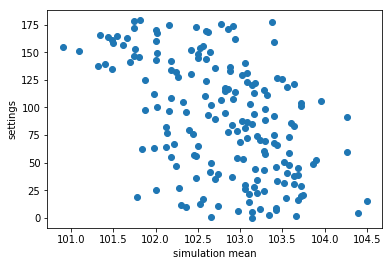

In [21]:
# y = np.arange(df_param_stats.shape[0])
x = df_param_stats.mean_cuml
y = np.arange(df_param_stats.shape[0])
plt.plot(x, y, 'o')
# plt.plot(*z, '-')
plt.xlabel("simulation mean")
plt.ylabel("settings")

In [22]:
# use decision tree to identify parameters/thresholds to get high score (25+)
    # i.e., change_rate == 0.2, m_nights == 10, etc.

# dot plot with ci lines for settings
    # or: https://seaborn.pydata.org/generated/seaborn.violinplot.html

# also, CLT: run above N times and grab mean

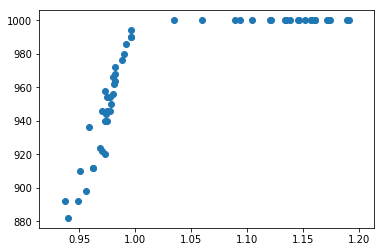

In [23]:
#, new_pref
plt.scatter(new_pref, bar_matrix[:,-1])

(array([44.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 56.]),
 array([-1000.,  -800.,  -600.,  -400.,  -200.,     0.,   200.,   400.,
          600.,   800.,  1000.]),
 <a list of 10 Patch objects>)

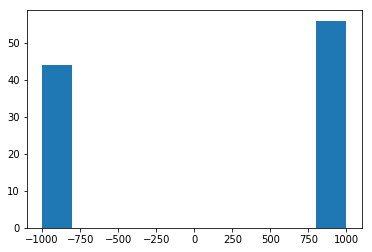

In [24]:
plt.hist(bar_matrix[:,-1])